In [3]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# load data
data = pd.read_csv('/content/#2235564_Data.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,9780,15712568,Angelo,515.0,Spain,Male,40.0,10,121355.99,1,1,0,138360.29,0
1,3276,15800215,Kwemtochukwu,658.0,France,Male,25.0,3,0.00,2,0,1,173948.40,0
2,8343,15773876,Tung,655.0,France,Female,34.0,3,0.00,2,1,0,159638.77,0
3,3753,15810385,Giordano,717.0,Spain,Female,36.0,2,164557.95,1,0,1,82336.73,0
4,5664,15765287,Grant,850.0,France,Female,38.0,2,0.00,2,1,0,9015.07,0


In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

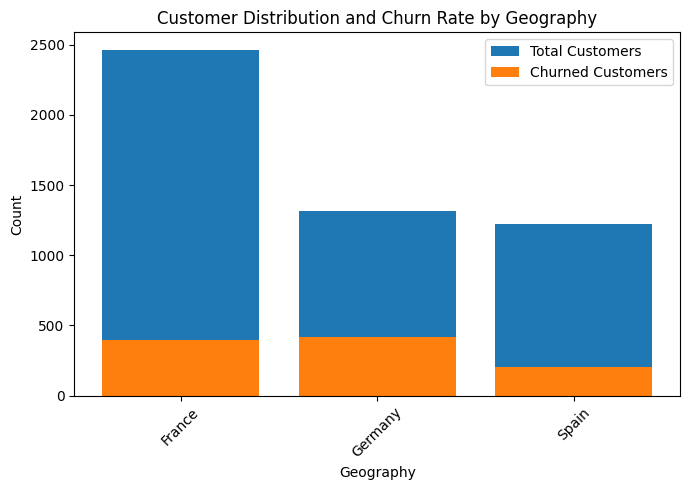

In [7]:
import matplotlib.pyplot as plt

# Customer distribution by region
Geography_counts = data["Geography"].value_counts()

# Churned customers per region
churned_per_region = data.groupby("Geography")["Exited"].sum()

# Create bar graph
plt.figure(figsize=(7, 5))

plt.bar(Geography_counts.index, Geography_counts.values, label="Total Customers")
plt.bar(churned_per_region.index, churned_per_region.values, label="Churned Customers")

plt.xlabel("Geography")
plt.ylabel("Count")
plt.title("Customer Distribution and Churn Rate by Geography")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
numerical_cols = ['EstimatedSalary','Age', 'Tenure','CreditScore' ]

data[numerical_cols].describe()

,EstimatedSalary,Age,Tenure,CreditScore
count,4.905000e+03,4924.000000,5000.000000,4901.000000
mean,1.051166e+05,40.730463,5.052000,709.852301
std,8.748155e+04,22.169302,2.892018,573.633857
min,1.158000e+01,4.800000,0.000000,56.125000
25%,5.156598e+04,32.000000,3.000000,580.000000
50%,1.008342e+05,37.000000,5.000000,652.000000
75%,1.505809e+05,44.000000,8.000000,720.000000
max,1.362091e+06,395.000000,10.000000,6528.000000


In [9]:
data["Exited"][data["Exited"]=="Yes"].groupby(by=data["Gender"]).count()

Series([], Name: Exited, dtype: int64)

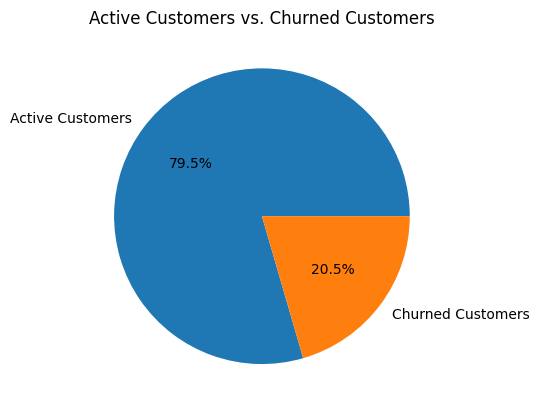

In [10]:
import matplotlib.pyplot as plt

# Counts of Active and Churned Customers
active_customers = len(data[data['Exited'] == 0])
churned_customers = len(data[data['Exited'] == 1])

# Data for Pie Chart
customer_status = [active_customers, churned_customers]
labels = ['Active Customers', 'Churned Customers']

# Create Pie Chart
plt.pie(customer_status, labels=labels, autopct='%1.1f%%')
plt.title('Active Customers vs. Churned Customers')
plt.show()


In [11]:
from sklearn.preprocessing import LabelEncoder


In [12]:
# Dropping columns

data.drop(['RowNumber', 'CustomerId','Geography', 'Surname'], axis=1, inplace=True)


In [13]:

# Label encoding gender column
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [14]:
data.isnull().sum()

CreditScore        99
Gender              0
Age                76
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    95
Exited              0
dtype: int64

In [15]:
# handle missing values

# Calculate the mean of each column containing missing values

credit_score_mean = data['CreditScore'].mean()
age_mean = data['Age'].mean()
salary_mean = data['EstimatedSalary'].mean()

# Fill missing values with their respective mean
data['CreditScore'].fillna(credit_score_mean, inplace=True)
data['Age'].fillna(age_mean, inplace=True)
data['EstimatedSalary'].fillna(salary_mean, inplace=True)

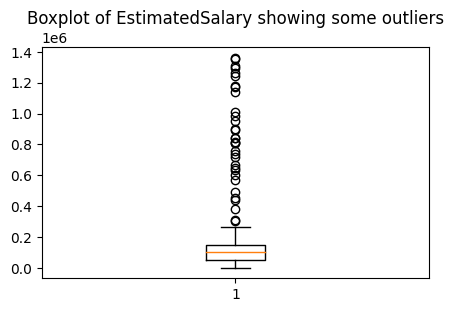

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(5, 3))

# Creating plot
plt.boxplot(data['EstimatedSalary'])
plt.title('Boxplot of EstimatedSalary showing some outliers')

# show plot
plt.show()

In [17]:
Q1= data.EstimatedSalary.quantile(0.25)
Q3= data.EstimatedSalary.quantile(0.75)
IQR = Q3-Q1


In [18]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit
outliers = data[(data['EstimatedSalary'] < lower_limit) | (data['EstimatedSalary'] > upper_limit)]
data = data[(data['EstimatedSalary'] >= lower_limit) & (data[ 'EstimatedSalary'] <= upper_limit)]


In [19]:
data = data.dropna()

# handle outliers
data = data[(data['Age'] > 0) & (data['Age'] < 100)]

# feature engineering
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [20]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [21]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:

# train model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# make predictions
y_pred = model.predict(X_test_scaled)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Accuracy: 80.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       778
           1       0.61      0.12      0.20       203

    accuracy                           0.80       981
   macro avg       0.71      0.55      0.55       981
weighted avg       0.77      0.80      0.75       981



In [23]:
# Count the number of occurrences for each class in the target variable
class_counts = y_train.value_counts()

# Print the class counts
print("Class counts:", class_counts)

Class counts: 0    3120
1     802
Name: Exited, dtype: int64
